In [16]:
import os
from PIL import Image
import numpy as np

# 定义类别标签
class_labels = {
    "daisy": 0,
    "dandelion": 1,
    "rose": 2,
    "sunflower": 3,
    "tulip": 4
}

# 定义函数加载图像数据
def load_data(root_dir):
    images = []
    labels = []

    for class_name in os.listdir(root_dir):
        class_dir = os.path.join(root_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                try:
                    # 使用PIL库加载图像
                    image = Image.open(image_path)
                    # 将图像转换为numpy数组
                    image = np.array(image)
                    images.append(image)
                    # 获取类别标签并添加到列表中
                    labels.append(class_labels[class_name])
                except Exception as e:
                    print(f"Error loading image: {image_path} - {e}")

    return np.array(images), np.array(labels)

# 加载数据集
root_dir = r"C:\Users\21032\桌面\flowers"
images, labels = load_data(root_dir)

# 检查加载的图像数量和标签数量是否一致
print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")


Total images loaded: 4322
Total labels loaded: 4322


<ipython-input-16-8e272138e4b1>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


In [9]:
from matplotlib import rcParams

# 设置全局字体
rcParams['font.family'] = 'SimHei'
rcParams['font.size'] = 14

# 之后绘制的图表会使用这个字体

<ipython-input-18-bc27926e5ba8>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


加载的图像总数: 4322
已加载标签总数: 4322
{'daisy': 768, 'dandelion': 1052, 'rose': 784, 'sunflower': 734, 'tulip': 984}


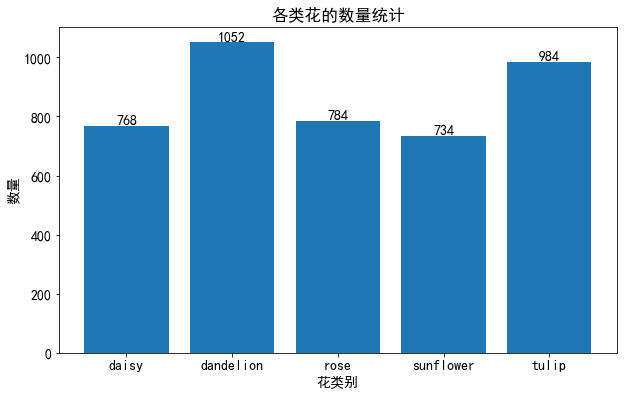

In [18]:
import os
from PIL import Image
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 定义类别标签
class_labels = {
    "daisy": 0,
    "dandelion": 1,
    "rose": 2,
    "sunflower": 3,
    "tulip": 4
}

# 定义函数加载图像数据
def load_data(root_dir):
    images = []
    labels = []

    for class_name in os.listdir(root_dir):
        class_dir = os.path.join(root_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                try:
                    # 使用PIL库加载图像
                    image = Image.open(image_path)
                    # 将图像转换为numpy数组
                    image = np.array(image)
                    images.append(image)
                    # 获取类别标签并添加到列表中
                    labels.append(class_labels[class_name])
                except Exception as e:
                    print(f"Error loading image: {image_path} - {e}")

    return np.array(images), np.array(labels)

# 加载数据集
root_dir = r"C:\Users\21032\桌面\flowers"
images, labels = load_data(root_dir)

# 检查加载的图像数量和标签数量是否一致
print(f"加载的图像总数: {len(images)}")
print(f"已加载标签总数: {len(labels)}")

# 统计每类花的数量
counter = Counter(labels)
flower_counts = {class_name: counter[label] for class_name, label in class_labels.items()}
print(flower_counts)

# 可视化各类花的数量
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(flower_counts.keys(), flower_counts.values())
plt.xlabel('花类别')
plt.ylabel('数量')
plt.title('各类花的数量统计')

# 显示标签
for x, y in enumerate(flower_counts.values()):
    plt.text(x, y+5, f'{y}', ha='center')

plt.show()

In [19]:
def remove_duplicate_images(images, labels):
    unique_images = []
    unique_labels = []
    seen_images = set()

    for i in range(len(images)):
        # 将图像转换为哈希值
        image_hash = hash(images[i].tobytes())

        # 检查图像是否已经存在
        if image_hash not in seen_images:
            seen_images.add(image_hash)
            unique_images.append(images[i])
            unique_labels.append(labels[i])

    return np.array(unique_images), np.array(unique_labels)

# 清除重复图像
clean_images, clean_labels = remove_duplicate_images(images, labels)

# 打印清洗后的图像数量和标签数量
print(f"Total unique images: {len(clean_images)}")
print(f"Total unique labels: {len(clean_labels)}")


Total unique images: 4316
Total unique labels: 4316


<ipython-input-19-73785041042d>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(unique_images), np.array(unique_labels)


In [20]:
def remove_blurry_images(images, labels, threshold):
    clear_images = []
    clear_labels = []

    for i in range(len(images)):
        # 使用图像的方差作为清晰度指标
        variance = np.var(images[i])

        # 如果方差超过阈值，则认为图像是清晰的
        if variance > threshold:
            clear_images.append(images[i])
            clear_labels.append(labels[i])

    return np.array(clear_images), np.array(clear_labels)

# 设置阈值
blur_threshold = 1000

# 清除模糊图像
clean_images, clean_labels = remove_blurry_images(clean_images, clean_labels, blur_threshold)

# 打印清洗后的图像数量和标签数量
print(f"Total clear images: {len(clean_images)}")
print(f"Total clear labels: {len(clean_labels)}")


Total clear images: 4287
Total clear labels: 4287


<ipython-input-20-4236d3982226>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clear_images), np.array(clear_labels)


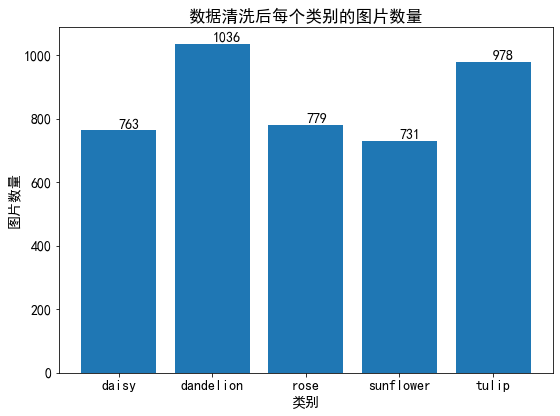

In [21]:
import matplotlib.pyplot as plt

# 统计每个类别的图片数量
class_counts = {}
for label in clean_labels:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

# 提取类别名称
class_names = list(class_labels.keys())

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制柱状图
plt.figure(figsize=(8,6))
bars = plt.bar(class_names, [class_counts[i] for i in range(len(class_names))])
plt.xlabel('类别')
plt.ylabel('图片数量')
plt.title('数据清洗后每个类别的图片数量')

# 在柱状图上显示具体数值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval), va='bottom')

# 增加间距
plt.tight_layout()

# 输出可视化统计图
plt.savefig('图片数量统计图.png')

plt.show()


In [11]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train data type:", X_train.dtype)
print("y_train data type:", y_train.dtype)


X_train shape: (3429, 1)
y_train shape: (3429,)
X_train data type: object
y_train data type: int32


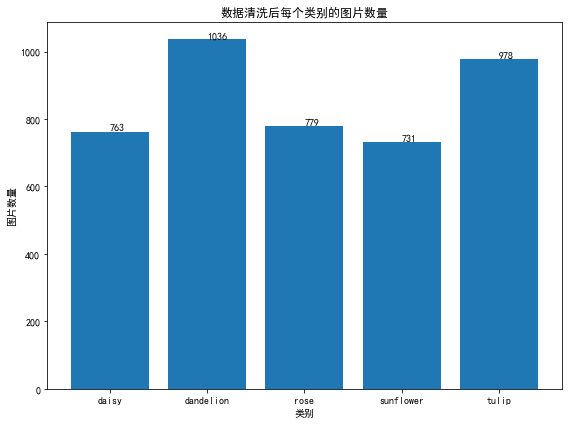

In [13]:
import matplotlib.pyplot as plt

# 统计每个类别的图片数量
class_counts = {}
for label in clean_labels:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

# 提取类别名称
class_names = list(class_labels.keys())

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制柱状图
plt.figure(figsize=(8,6))
bars = plt.bar(class_names, [class_counts[i] for i in range(len(class_names))])
plt.xlabel('类别')
plt.ylabel('图片数量')
plt.title('数据清洗后每个类别的图片数量')

# 在柱状图上显示具体数值
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval), va='bottom')

# 增加间距
plt.tight_layout()

# 输出可视化统计图
plt.savefig('图片数量统计图.png')

plt.show()


In [18]:
import os
from PIL import Image
import numpy as np

# 定义类别标签
class_labels = {
    "daisy": 0,
    "dandelion": 1,
    "rose": 2,
    "sunflower": 3,
    "tulip": 4
}

# 加载数据集
def load_data(root_dir):
    images = []
    labels = []

    for class_name in os.listdir(root_dir):
        class_dir = os.path.join(root_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                try:
                    # 使用PIL库加载图像
                    image = Image.open(image_path)
                    # 将图像转换为numpy数组
                    image = np.array(image)
                    images.append(image)
                    # 获取类别标签并添加到列表中
                    labels.append(class_labels[class_name])
                except Exception as e:
                    print(f"Error loading image: {image_path} - {e}")

    return np.array(images), np.array(labels)

# 加载数据集
root_dir = r"C:\Users\21032\桌面\flowers"
images, labels = load_data(root_dir)

# 检查加载的图像数量和标签数量是否一致
print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")


Total images loaded: 4322
Total labels loaded: 4322


<ipython-input-18-c1a2bc63dd90>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


In [19]:
# 清除重复图像
def remove_duplicate_images(images, labels):
    unique_images = []
    unique_labels = []
    seen_images = set()

    for i in range(len(images)):
        # 将图像转换为哈希值
        image_hash = hash(images[i].tobytes())

        # 检查图像是否已经存在
        if image_hash not in seen_images:
            seen_images.add(image_hash)
            unique_images.append(images[i])
            unique_labels.append(labels[i])

    return np.array(unique_images), np.array(unique_labels)

# 清除模糊图像
def remove_blurry_images(images, labels, threshold):
    clear_images = []
    clear_labels = []

    for i in range(len(images)):
        # 使用图像的方差作为清晰度指标
        variance = np.var(images[i])

        # 如果方差超过阈值，则认为图像是清晰的
        if variance > threshold:
            clear_images.append(images[i])
            clear_labels.append(labels[i])

    return np.array(clear_images), np.array(clear_labels)


In [24]:
# 重新定义 load_data 函数，确保每个图像都被正确地转换为 NumPy 数组
def load_data(root_dir):
    images = []
    labels = []

    for class_name in os.listdir(root_dir):
        class_dir = os.path.join(root_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                try:
                    # 使用PIL库加载图像
                    image = Image.open(image_path)
                    # 将图像转换为numpy数组
                    image = np.array(image)
                    # 检查图像的维度，如果是灰度图，则将其转换为RGB图像
                    if len(image.shape) == 2:
                        image = np.stack((image,) * 3, axis=-1)
                    images.append(image)
                    # 获取类别标签并添加到列表中
                    labels.append(class_labels[class_name])
                except Exception as e:
                    print(f"Error loading image: {image_path} - {e}")

    return np.array(images), np.array(labels)

# 加载数据集
root_dir = r"C:\Users\21032\桌面\flowers"
images, labels = load_data(root_dir)

# 清洗数据
clean_images, clean_labels = remove_duplicate_images(images, labels)
clean_images, clean_labels = remove_blurry_images(clean_images, clean_labels, blur_threshold)

# 打印清洗后的数据形状和类型
print("Clean images shape:", clean_images.shape)
print("Clean labels shape:", clean_labels.shape)
print("Clean images data type:", clean_images.dtype)
print("Clean labels data type:", clean_labels.dtype)


<ipython-input-24-41f325d64dce>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)
<ipython-input-23-9d7e08a742ef>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(unique_images), np.array(unique_labels)


Clean images shape: (4287,)
Clean labels shape: (4287,)
Clean images data type: object
Clean labels data type: int32


<ipython-input-23-9d7e08a742ef>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clear_images), np.array(clear_labels)


In [25]:
from PIL import Image

# 重新定义 remove_blurry_images 函数，确保所有图像具有相同的尺寸
def remove_blurry_images(images, labels, threshold):
    clear_images = []
    clear_labels = []

    for i in range(len(images)):
        # 使用PIL库重新调整图像尺寸为 (224, 224)，确保所有图像具有相同的尺寸
        image = Image.fromarray(images[i])
        image = image.resize((224, 224))
        image = np.array(image)

        # 使用图像的方差作为清晰度指标
        variance = np.var(image)

        # 如果方差超过阈值，则认为图像是清晰的
        if variance > threshold:
            clear_images.append(image)
            clear_labels.append(labels[i])

    return np.array(clear_images), np.array(clear_labels)

# 清除模糊图像
clean_images, clean_labels = remove_blurry_images(clean_images, clean_labels, blur_threshold)

# 打印清洗后的数据形状和类型
print("Clean images shape:", clean_images.shape)
print("Clean labels shape:", clean_labels.shape)
print("Clean images data type:", clean_images.dtype)
print("Clean labels data type:", clean_labels.dtype)


Clean images shape: (4285, 224, 224, 3)
Clean labels shape: (4285,)
Clean images data type: uint8
Clean labels data type: int32


In [ ]:
现在清洗后的数据具有了正确的形状和类型。clean_images 是一个包含 4285 张图像的数组，每张图像的尺寸为 224x224，
具有 3 个通道 (RGB)，数据类型为 uint8。clean_labels 是一个包含 4285 个标签的数组，数据类型为 int32。

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm  # 使用tqdm.auto自动选择合适的进度条库

# 将清洗后的图像和标签转换为 PyTorch 张量
X = torch.tensor(clean_images, dtype=torch.float32)  # 假设 clean_images 已经归一化
y = torch.tensor(clean_labels, dtype=torch.long)

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建训练集和测试集的 DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=64)

# 定义 SVM 模型
class SVM(nn.Module):
    def __init__(self):
        super(SVM, self).__init__()
        # 全连接层，输入尺寸为图像尺寸（224 * 224 * 3），输出尺寸为类别数量
        self.fc = nn.Linear(224 * 224 * 3, len(class_labels))

    def forward(self, x):
        # 展平输入张量
        x = x.view(x.size(0), -1)
        # 前向传播
        x = self.fc(x)
        return x

# 初始化模型、损失函数和优化器
model = SVM()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)  # 调整学习率为0.001

# 训练模型
print("训练 SVM 分类器...")
for epoch in range(20):  # 增加训练轮数为20轮
    train_loss = 0.0
    correct = 0
    total = 0
    # 使用 tqdm 显示训练进度条
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 计算损失值和准确率
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    print(f"训练损失：{train_loss:.4f}, 训练准确率：{train_accuracy:.4f}")

# 评估模型
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    # 使用 tqdm 显示评估进度条
    for inputs, labels in tqdm(test_loader, desc="评估", leave=False):
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"测试准确率：{accuracy:.4f}")


训练 SVM 分类器...


Epoch 1:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：418456.0106, 训练准确率：0.2579


Epoch 2:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：328107.1917, 训练准确率：0.2996


Epoch 3:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：240642.8204, 训练准确率：0.3562


Epoch 4:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：261850.8116, 训练准确率：0.3509


Epoch 5:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：263328.7971, 训练准确率：0.3550


Epoch 6:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：224273.4445, 训练准确率：0.3795


Epoch 7:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：210503.8578, 训练准确率：0.3886


Epoch 8:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：233694.9014, 训练准确率：0.3877


Epoch 9:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：220740.5238, 训练准确率：0.3880


Epoch 10:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：209491.1711, 训练准确率：0.4032


Epoch 11:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：195076.4268, 训练准确率：0.4119


Epoch 12:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：218859.6568, 训练准确率：0.3956


Epoch 13:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：186315.1422, 训练准确率：0.4212


Epoch 14:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：200628.6053, 训练准确率：0.4151


Epoch 15:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：175196.2157, 训练准确率：0.4419


Epoch 16:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：173555.2636, 训练准确率：0.4367


Epoch 17:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：171014.6336, 训练准确率：0.4446


Epoch 18:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：150331.9091, 训练准确率：0.4822


Epoch 19:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：177957.5412, 训练准确率：0.4408


Epoch 20:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：182118.9928, 训练准确率：0.4387


评估:   0%|          | 0/14 [00:00<?, ?it/s]

测试准确率：0.3839


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from tqdm.auto import tqdm  # 使用tqdm.auto自动选择合适的进度条库

# 将清洗后的图像和标签转换为 PyTorch 张量
X = torch.tensor(clean_images, dtype=torch.float32)  # 假设 clean_images 已经归一化
y = torch.tensor(clean_labels, dtype=torch.long)

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建训练集和测试集的 DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=64)

# 定义 SVM 模型
class SVM(nn.Module):
    def __init__(self):
        super(SVM, self).__init__()
        # 全连接层，输入尺寸为图像尺寸（224 * 224 * 3），输出尺寸为类别数量
        self.fc = nn.Linear(224 * 224 * 3, len(class_labels))

    def forward(self, x):
        # 展平输入张量
        x = x.view(x.size(0), -1)
        # 前向传播
        x = self.fc(x)
        return x

# 初始化模型、损失函数和优化器
model = SVM()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)  # 调整学习率为0.001

# 训练模型
print("训练 SVM 分类器...")
for epoch in range(20):  # 增加训练轮数为20轮
    train_loss = 0.0
    correct = 0
    total = 0
    # 使用 tqdm 显示训练进度条
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 计算损失值和准确率
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    print(f"训练损失：{train_loss:.4f}, 训练准确率：{train_accuracy:.4f}")

# 评估模型
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    # 使用 tqdm 显示评估进度条
    for inputs, labels in tqdm(test_loader, desc="评估", leave=False):
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        # 收集预测结果和真实标签以计算 F1 分数
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

accuracy = correct / total
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"测试准确率：{accuracy:.4f}")
print(f"F1 分数：{f1:.4f}")


训练 SVM 分类器...


Epoch 1:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：448005.9489, 训练准确率：0.2369


Epoch 2:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：306886.7360, 训练准确率：0.3209


Epoch 3:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：266732.9952, 训练准确率：0.3428


Epoch 4:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：258918.0953, 训练准确率：0.3451


Epoch 5:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：222633.5745, 训练准确率：0.3880


Epoch 6:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：246958.3407, 训练准确率：0.3658


Epoch 7:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：212056.5742, 训练准确率：0.3877


Epoch 8:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：228186.8201, 训练准确率：0.3932


Epoch 9:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：214120.8331, 训练准确率：0.4026


Epoch 10:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：219611.2245, 训练准确率：0.4110


Epoch 11:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：189826.3426, 训练准确率：0.4183


Epoch 12:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：189702.5897, 训练准确率：0.4209


Epoch 13:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：187255.1168, 训练准确率：0.4183


Epoch 14:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：183673.2933, 训练准确率：0.4297


Epoch 15:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：217134.9324, 训练准确率：0.4002


Epoch 16:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：177446.2886, 训练准确率：0.4600


Epoch 17:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：185823.3127, 训练准确率：0.4364


Epoch 18:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：172243.8953, 训练准确率：0.4463


Epoch 19:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：165002.1720, 训练准确率：0.4665


Epoch 20:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：173622.1688, 训练准确率：0.4571


评估:   0%|          | 0/14 [00:00<?, ?it/s]

测试准确率：0.3921
F1 分数：0.3306


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm.auto import tqdm  # 使用tqdm.auto自动选择合适的进度条库

# 将清洗后的图像和标签转换为 PyTorch 张量
X = torch.tensor(clean_images, dtype=torch.float32)  # 假设 clean_images 已经归一化
y = torch.tensor(clean_labels, dtype=torch.long)

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建训练集和测试集的 DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=64)

# 定义 SVM 模型
class SVM(nn.Module):
    def __init__(self):
        super(SVM, self).__init__()
        # 全连接层，输入尺寸为图像尺寸（224 * 224 * 3），输出尺寸为类别数量
        self.fc = nn.Linear(224 * 224 * 3, len(class_labels))

    def forward(self, x):
        # 展平输入张量
        x = x.view(x.size(0), -1)
        # 前向传播
        x = self.fc(x)
        return x

# 初始化模型、损失函数和优化器
model = SVM()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)  # 调整学习率为0.001

# 训练模型
print("训练 SVM 分类器...")
for epoch in range(20):  # 增加训练轮数为20轮
    train_loss = 0.0
    correct = 0
    total = 0
    # 使用 tqdm 显示训练进度条
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 计算损失值和准确率
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    print(f"训练损失：{train_loss:.4f}, 训练准确率：{train_accuracy:.4f}")

# 评估模型
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    # 使用 tqdm 显示评估进度条
    for inputs, labels in tqdm(test_loader, desc="评估", leave=False):
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())

report = classification_report(true_labels, predicted_labels)
print(report)


训练 SVM 分类器...


Epoch 1:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：445230.9046, 训练准确率：0.2474


Epoch 2:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：295100.1051, 训练准确率：0.3241


Epoch 3:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：288472.1846, 训练准确率：0.3273


Epoch 4:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：253131.4570, 训练准确率：0.3617


Epoch 5:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：261809.5146, 训练准确率：0.3644


Epoch 6:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：234164.7728, 训练准确率：0.3795


Epoch 7:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：247256.9842, 训练准确率：0.3606


Epoch 8:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：201703.8687, 训练准确率：0.3994


Epoch 9:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：215059.4702, 训练准确率：0.3961


Epoch 10:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：183031.5567, 训练准确率：0.4332


Epoch 11:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：196788.3481, 训练准确率：0.4107


Epoch 12:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：222370.7265, 训练准确率：0.3959


Epoch 13:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：173280.7495, 训练准确率：0.4489


Epoch 14:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：175345.6695, 训练准确率：0.4373


Epoch 15:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：200189.4242, 训练准确率：0.4247


Epoch 16:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：177244.2330, 训练准确率：0.4344


Epoch 17:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：210382.4033, 训练准确率：0.4230


Epoch 18:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：178345.7484, 训练准确率：0.4437


Epoch 19:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：198842.6108, 训练准确率：0.4154


Epoch 20:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：176356.4261, 训练准确率：0.4434


评估:   0%|          | 0/14 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.37      0.61      0.46       166
           1       0.75      0.01      0.03       219
           2       0.60      0.34      0.43       152
           3       0.27      0.96      0.42       135
           4       0.67      0.04      0.08       185

    accuracy                           0.34       857
   macro avg       0.53      0.39      0.28       857
weighted avg       0.56      0.34      0.26       857



# SVM

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from torchvision import transforms
from tqdm.auto import tqdm

# 数据增强
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
])

# 创建训练集和测试集的 DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=64)

# 定义 SVM 模型
class SVM(nn.Module):
    def __init__(self):
        super(SVM, self).__init__()
        self.fc = nn.Linear(224 * 224 * 3, len(class_labels))

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# 初始化模型、损失函数和优化器
model = SVM()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)

# 训练模型
print("训练 SVM 分类器...")
for epoch in range(10):  # 调整需要的训练轮数
    train_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    print(f"训练损失：{train_loss:.4f}, 训练准确率：{train_accuracy:.4f}")

# 评估模型
model.eval()
true_labels = []
predicted_labels = []
with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="评估", leave=False):
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())

# 计算 F1 分数
f1 = f1_score(true_labels, predicted_labels, average='macro')
print(f"F1 分数：{f1:.4f}")


训练 SVM 分类器...


Epoch 1:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：454035.9649, 训练准确率：0.3186


Epoch 2:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：420418.1015, 训练准确率：0.3731


Epoch 3:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：350699.2171, 训练准确率：0.4262


Epoch 4:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：301445.3435, 训练准确率：0.4282


Epoch 5:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：278219.9025, 训练准确率：0.4726


Epoch 6:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：206928.8125, 训练准确率：0.5006


Epoch 7:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：279180.5127, 训练准确率：0.4877


Epoch 8:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：276084.1200, 训练准确率：0.4918


Epoch 9:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：209805.1162, 训练准确率：0.5280


Epoch 10:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：157398.8615, 训练准确率：0.5852


评估:   0%|          | 0/14 [00:00<?, ?it/s]

F1 分数：0.2872


In [48]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from tqdm.auto import tqdm
import numpy as np

# 将清洗后的图像和标签转换为 numpy 数组
X = np.array(clean_images)  # 假设 clean_images 已经归一化
y = np.array(clean_labels)

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 将图像数据展平
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 定义 SVM 模型
svm = SVC(kernel='linear', C=1.0)  # 选择线性核，可以根据需要调整超参数 C

# 训练模型
print("训练 SVM 模型...")
svm.fit(X_train_flat, y_train)

# 评估模型
y_pred = svm.predict(X_test_flat)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"测试准确率：{accuracy:.4f}")
print(f"F1 分数：{f1:.4f}")


训练 SVM 模型...
测试准确率：0.4212
F1 分数：0.4192


# 多层感知器（MLP）

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from tqdm.auto import tqdm

# 将清洗后的图像和标签转换为 PyTorch 张量
X = torch.tensor(clean_images, dtype=torch.float32)  # 假设 clean_images 已经归一化
y = torch.tensor(clean_labels, dtype=torch.long)

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建训练集和测试集的 DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=64)

# 定义多层感知器模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 初始化模型、损失函数和优化器
model = MLP(input_size=224 * 224 * 3, hidden_size=128, num_classes=len(class_labels))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
print("训练 MLP 模型...")
for epoch in range(10):  # 调整需要的训练轮数
    train_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False):
        optimizer.zero_grad()
        outputs = model(inputs.view(inputs.size(0), -1))  # 展平输入张量
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 计算损失值和准确率
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    print(f"训练损失：{train_loss:.4f}, 训练准确率：{train_accuracy:.4f}")

# 评估模型
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for inputs, labels in tqdm(test_loader, desc="评估", leave=False):
        outputs = model(inputs.view(inputs.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

accuracy = correct / total
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"测试准确率：{accuracy:.4f}")
print(f"F1 分数：{f1:.4f}")


训练 MLP 模型...


Epoch 1:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：2924.4991, 训练准确率：0.2800


Epoch 2:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：74.9915, 训练准确率：0.4049


Epoch 3:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：15.1304, 训练准确率：0.2771


Epoch 4:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：1.6142, 训练准确率：0.2392


Epoch 5:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：1.6096, 训练准确率：0.2392


Epoch 6:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：1.6075, 训练准确率：0.2392


Epoch 7:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：1.6033, 训练准确率：0.2392


Epoch 8:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：1.6018, 训练准确率：0.2395


Epoch 9:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：1.6007, 训练准确率：0.2392


Epoch 10:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：1.6000, 训练准确率：0.2395


评估:   0%|          | 0/14 [00:00<?, ?it/s]

测试准确率：0.2567
F1 分数：0.1064


In [38]:
# 我们增加了隐藏层的大小（hidden_size=256），将学习率调整为0.0001，并继续使用Adam优化器。
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from tqdm.auto import tqdm

# 将清洗后的图像和标签转换为 PyTorch 张量
X = torch.tensor(clean_images, dtype=torch.float32)  # 假设 clean_images 已经归一化
y = torch.tensor(clean_labels, dtype=torch.long)

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建训练集和测试集的 DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=64)

# 定义多层感知器模型
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 初始化模型、损失函数和优化器
model = MLP(input_size=224 * 224 * 3, hidden_size=256, num_classes=len(class_labels))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 调整学习率为0.0001

# 训练模型
print("训练 MLP 模型...")
for epoch in range(10):  # 调整需要的训练轮数
    train_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False):
        optimizer.zero_grad()
        outputs = model(inputs.view(inputs.size(0), -1))  # 展平输入张量
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 计算损失值和准确率
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    print(f"训练损失：{train_loss:.4f}, 训练准确率：{train_accuracy:.4f}")

# 评估模型
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for inputs, labels in tqdm(test_loader, desc="评估", leave=False):
        outputs = model(inputs.view(inputs.size(0), -1))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

accuracy = correct / total
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"测试准确率：{accuracy:.4f}")
print(f"F1 分数：{f1:.4f}")


训练 MLP 模型...


Epoch 1:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：444.1050, 训练准确率：0.3092


Epoch 2:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：58.4103, 训练准确率：0.3941


Epoch 3:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：43.1599, 训练准确率：0.4291


Epoch 4:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：48.8859, 训练准确率：0.4209


Epoch 5:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：29.1635, 训练准确率：0.4904


Epoch 6:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：29.2301, 训练准确率：0.4743


Epoch 7:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：27.5989, 训练准确率：0.5175


Epoch 8:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：29.3232, 训练准确率：0.4907


Epoch 9:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：33.3249, 训练准确率：0.5137


Epoch 10:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：18.7256, 训练准确率：0.5741


评估:   0%|          | 0/14 [00:00<?, ?it/s]

测试准确率：0.3956
F1 分数：0.3112


# ResNet

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from tqdm.auto import tqdm

# 将清洗后的图像和标签转换为 PyTorch 张量
X = torch.tensor(clean_images, dtype=torch.float32)  # 假设 clean_images 已经归一化
# 调整通道维度的顺序
X = X.permute(0, 3, 1, 2)
y = torch.tensor(clean_labels, dtype=torch.long)

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建训练集和测试集的 DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=64)

# 定义 ResNet 模型
resnet = models.resnet18(pretrained=True)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, len(class_labels))

# 初始化模型、损失函数和优化器
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)  # 将模型移动到 GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.01)

# 训练模型
print("训练 ResNet 模型...")
for epoch in range(10):  # 调整需要的训练轮数
    train_loss = 0.0
    correct = 0
    total = 0
    # 使用 tqdm 显示训练进度条
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)  # 将输入张量和标签移动到 GPU
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 计算损失值和准确率
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    print(f"训练损失：{train_loss:.4f}, 训练准确率：{train_accuracy:.4f}")

# 评估模型
resnet.eval()
with torch.no_grad():
    correct = 0
    total = 0
    predictions = []
    true_labels = []
    # 使用 tqdm 显示评估进度条
    for inputs, labels in tqdm(test_loader, desc="评估", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)  # 将输入张量和标签移动到 GPU
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # 收集预测结果和真实标签以计算 F1 分数
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = correct / total
f1 = f1_score(true_labels, predictions, average='weighted')  # 计算 F1 分数
print(f"测试准确率：{accuracy:.4f}")
print(f"F1 分数：{f1:.4f}")


D:\anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


训练 MLP 模型...


Epoch 1:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.7924, 训练准确率：0.7348


Epoch 2:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.3556, 训练准确率：0.8912


Epoch 3:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.2377, 训练准确率：0.9338


Epoch 4:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.1818, 训练准确率：0.9457


Epoch 5:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.1352, 训练准确率：0.9653


Epoch 6:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.1041, 训练准确率：0.9775


Epoch 7:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.0800, 训练准确率：0.9860


Epoch 8:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.0702, 训练准确率：0.9866


Epoch 9:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.0506, 训练准确率：0.9912


Epoch 10:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.0427, 训练准确率：0.9962


评估:   0%|          | 0/14 [00:00<?, ?it/s]

测试准确率：0.9253
F1 分数：0.9255


In [47]:
# ResNet-18 是一个深度卷积神经网络，
# 属于深度学习模型，而不是 MLP（多层感知器）或 SVM（支持向量机）。
# 它在图像分类任务中表现出色，通常用于处理计算机视觉问题。
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from tqdm.auto import tqdm
import torchvision.models as models
import torchvision.transforms as transforms

# 假设 clean_images 和 clean_labels 已经定义好

# 将清洗后的图像和标签转换为 PyTorch 张量
X = torch.tensor(clean_images, dtype=torch.float32)  # 假设 clean_images 已经归一化
# 调整通道维度的顺序
X = X.permute(0, 3, 1, 2)
y = torch.tensor(clean_labels, dtype=torch.long)

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建训练集和测试集的 DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=64)

# 定义 ResNet 模型
resnet = models.resnet18(pretrained=True)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, len(class_labels))

# 初始化模型、损失函数和优化器
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet = resnet.to(device)  # 将模型移动到 GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.01)

# 训练模型
print("训练 ResNet 模型...")
for epoch in range(10):  # 调整需要的训练轮数
    train_loss = 0.0
    correct = 0
    total = 0
    # 使用 tqdm 显示训练进度条
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)  # 将输入张量和标签移动到 GPU
        optimizer.zero_grad()
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 计算损失值和准确率
        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    print(f"训练损失：{train_loss:.4f}, 训练准确率：{train_accuracy:.4f}")

# 评估模型
resnet.eval()
with torch.no_grad():
    correct = 0
    total = 0
    predictions = []
    true_labels = []
    # 使用 tqdm 显示评估进度条
    for inputs, labels in tqdm(test_loader, desc="评估", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)  # 将输入张量和标签移动到 GPU
        outputs = resnet(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # 收集预测结果和真实标签以计算 F1 分数
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = correct / total
f1 = f1_score(true_labels, predictions, average='weighted')  # 计算 F1 分数
print(f"测试准确率：{accuracy:.4f}")
print(f"F1 分数：{f1:.4f}")





D:\anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


训练 ResNet 模型...


Epoch 1:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.7942, 训练准确率：0.7421


Epoch 2:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.3496, 训练准确率：0.8985


Epoch 3:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.2441, 训练准确率：0.9306


Epoch 4:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.1831, 训练准确率：0.9492


Epoch 5:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.1413, 训练准确率：0.9618


Epoch 6:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.1065, 训练准确率：0.9778


Epoch 7:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.0857, 训练准确率：0.9831


Epoch 8:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.0644, 训练准确率：0.9901


Epoch 9:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.0494, 训练准确率：0.9927


Epoch 10:   0%|          | 0/54 [00:00<?, ?it/s]

训练损失：0.0385, 训练准确率：0.9956


评估:   0%|          | 0/14 [00:00<?, ?it/s]

测试准确率：0.9230
F1 分数：0.9231


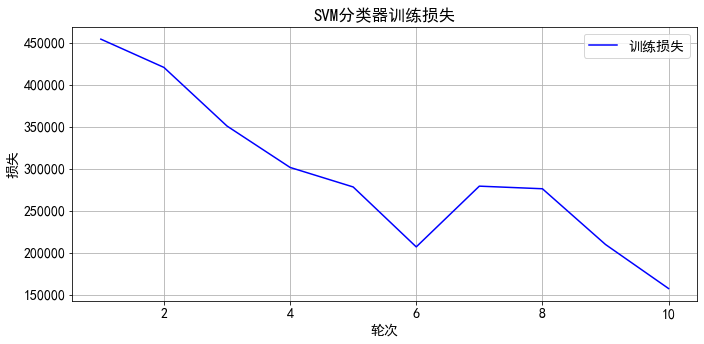

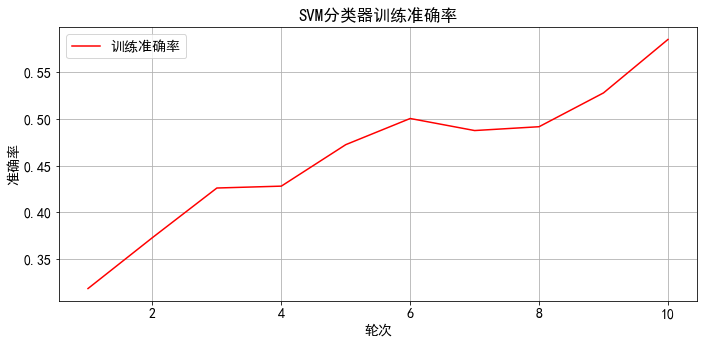

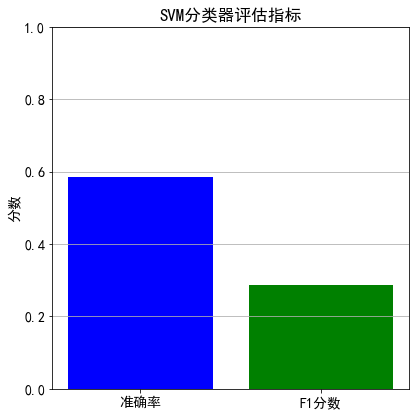

In [24]:
import matplotlib.pyplot as plt

# 训练过程中的损失和准确率数据
train_losses = [454035.9649, 420418.1015, 350699.2171, 301445.3435, 278219.9025,
                206928.8125, 279180.5127, 276084.1200, 209805.1162, 157398.8615]
train_accuracies = [0.3186, 0.3731, 0.4262, 0.4282, 0.4726, 0.5006, 0.4877, 0.4918, 0.5280, 0.5852]

epochs = range(1, len(train_losses) + 1)

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, 'b-', label='训练损失')
plt.title('SVM分类器训练损失')
plt.xlabel('轮次')
plt.ylabel('损失')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 绘制准确率曲线
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, 'r-', label='训练准确率')
plt.title('SVM分类器训练准确率')
plt.xlabel('轮次')
plt.ylabel('准确率')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 模型评估指标数据
f1_score = 0.2872

# 绘制柱状图展示评估指标
plt.figure(figsize=(6, 6))
labels = ['准确率', 'F1分数']
values = [train_accuracies[-1], f1_score]
plt.bar(labels, values, color=['blue', 'green'])
plt.title('SVM分类器评估指标')
plt.ylabel('分数')
plt.ylim(0, 1.0)  # 设定y轴范围为0到1
plt.grid(axis='y')
plt.tight_layout()
plt.show()


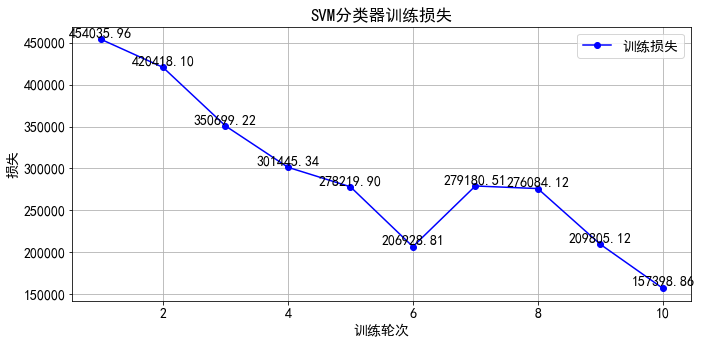

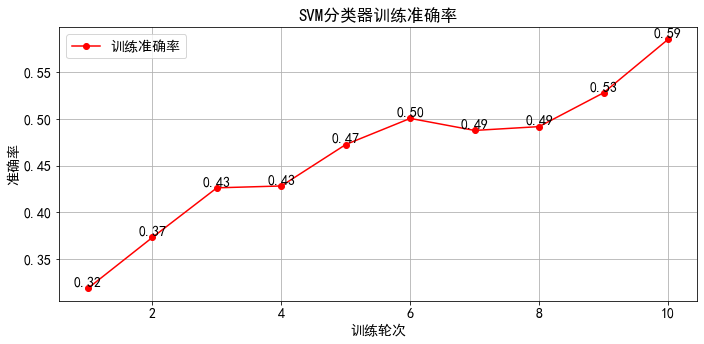

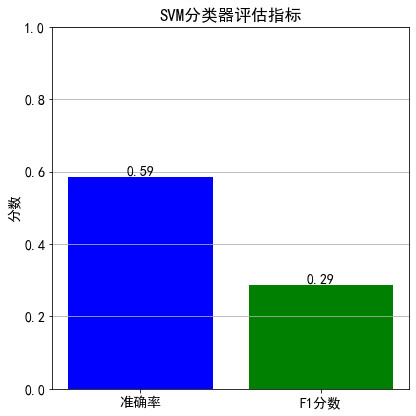

In [27]:
import matplotlib.pyplot as plt

# 训练过程中的损失和准确率数据
train_losses = [454035.9649, 420418.1015, 350699.2171, 301445.3435, 278219.9025,
                206928.8125, 279180.5127, 276084.1200, 209805.1162, 157398.8615]
train_accuracies = [0.3186, 0.3731, 0.4262, 0.4282, 0.4726, 0.5006, 0.4877, 0.4918, 0.5280, 0.5852]

epochs = range(1, len(train_losses) + 1)

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, 'b-', marker='o', label='训练损失')
plt.title('SVM分类器训练损失')
plt.xlabel('训练轮次')
plt.ylabel('损失')
plt.legend()
plt.grid(True)
for x, y in zip(epochs, train_losses):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('svm_损失曲线.png')  # 保存图片
plt.show()

# 绘制准确率曲线
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, 'r-', marker='o', label='训练准确率')
plt.title('SVM分类器训练准确率')
plt.xlabel('训练轮次')
plt.ylabel('准确率')
plt.legend()
plt.grid(True)
for x, y in zip(epochs, train_accuracies):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('svm_准确率曲线.png')  # 保存图片
plt.show()

# 模型评估指标数据
f1_score = 0.2872

# 绘制柱状图展示评估指标
plt.figure(figsize=(6, 6))
labels = ['准确率', 'F1分数']
values = [train_accuracies[-1], f1_score]
bars = plt.bar(labels, values, color=['blue', 'green'])
plt.title('SVM分类器评估指标')
plt.ylabel('分数')
plt.ylim(0, 1.0)  # 设定y轴范围为0到1
plt.grid(axis='y')
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('SVM分类器评估指标.png')  # 保存图片
plt.show()


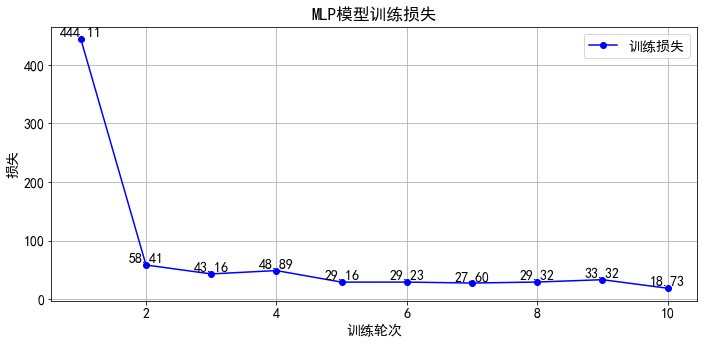

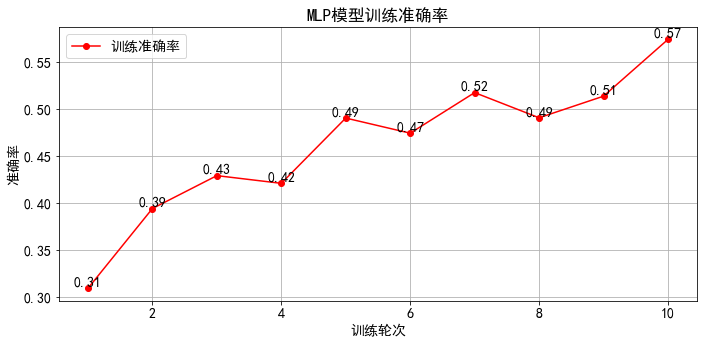

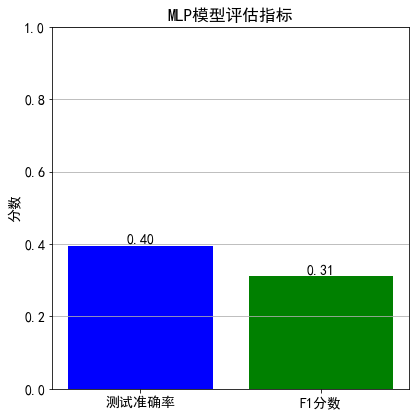

In [28]:
import matplotlib.pyplot as plt

# 训练过程中的损失和准确率数据
train_losses = [444.1050, 58.4103, 43.1599, 48.8859, 29.1635,
                29.2301, 27.5989, 29.3232, 33.3249, 18.7256]
train_accuracies = [0.3092, 0.3941, 0.4291, 0.4209, 0.4904,
                    0.4743, 0.5175, 0.4907, 0.5137, 0.5741]
test_accuracy = 0.3956
f1_score = 0.3112

epochs = range(1, len(train_losses) + 1)

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, 'b-', marker='o', label='训练损失')
plt.title('MLP模型训练损失')
plt.xlabel('训练轮次')
plt.ylabel('损失')
plt.legend()
plt.grid(True)
for x, y in zip(epochs, train_losses):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('mlp_损失曲线.png')  # 保存图片
plt.show()

# 绘制准确率曲线
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, 'r-', marker='o', label='训练准确率')
plt.title('MLP模型训练准确率')
plt.xlabel('训练轮次')
plt.ylabel('准确率')
plt.legend()
plt.grid(True)
for x, y in zip(epochs, train_accuracies):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('mlp_准确率曲线.png')  # 保存图片
plt.show()

# 模型评估指标数据
evaluation_metrics = ['测试准确率', 'F1分数']
metrics_values = [test_accuracy, f1_score]

# 绘制柱状图展示评估指标
plt.figure(figsize=(6, 6))
bars = plt.bar(evaluation_metrics, metrics_values, color=['blue', 'green'])
plt.title('MLP模型评估指标')
plt.ylabel('分数')
plt.ylim(0, 1.0)  # 设定y轴范围为0到1
plt.grid(axis='y')
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, value, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('mlp_评估指标.png')  # 保存图片
plt.show()


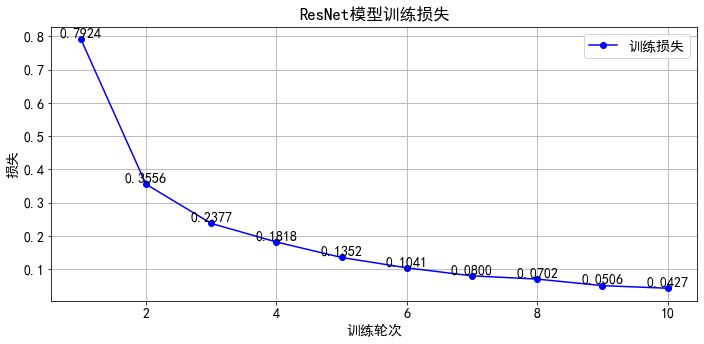

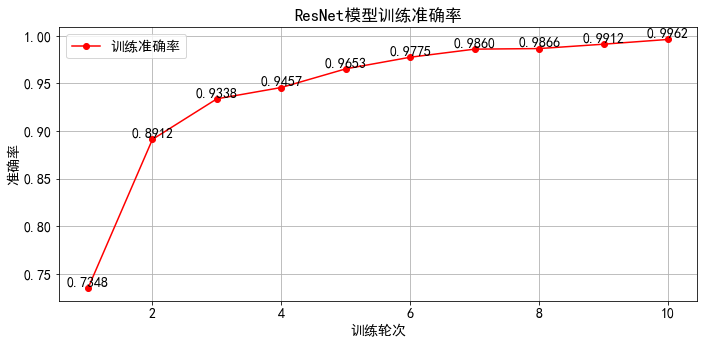

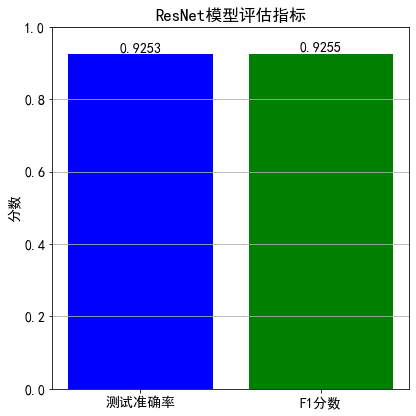

In [30]:
import matplotlib.pyplot as plt

# 训练过程中的损失和准确率数据
train_losses = [0.7924, 0.3556, 0.2377, 0.1818, 0.1352,
                0.1041, 0.0800, 0.0702, 0.0506, 0.0427]
train_accuracies = [0.7348, 0.8912, 0.9338, 0.9457, 0.9653,
                    0.9775, 0.9860, 0.9866, 0.9912, 0.9962]
test_accuracy = 0.9253
f1_score = 0.9255

epochs = range(1, len(train_losses) + 1)

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, 'b-', marker='o', label='训练损失')
plt.title('ResNet模型训练损失')
plt.xlabel('训练轮次')
plt.ylabel('损失')
plt.legend()
plt.grid(True)
for x, y in zip(epochs, train_losses):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('resnet_损失曲线.png')  # 保存图片
plt.show()

# 绘制准确率曲线
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, 'r-', marker='o', label='训练准确率')
plt.title('ResNet模型训练准确率')
plt.xlabel('训练轮次')
plt.ylabel('准确率')
plt.legend()
plt.grid(True)
for x, y in zip(epochs, train_accuracies):
    plt.text(x, y, f'{y:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('resnet_准确率曲线')  # 保存图片
plt.show()

# 模型评估指标数据
evaluation_metrics = ['测试准确率', 'F1分数']
metrics_values = [test_accuracy, f1_score]

# 绘制柱状图展示评估指标
plt.figure(figsize=(6, 6))
bars = plt.bar(evaluation_metrics, metrics_values, color=['blue', 'green'])
plt.title('ResNet模型评估指标')
plt.ylabel('分数')
plt.ylim(0, 1.0)  # 设定y轴范围为0到1
plt.grid(axis='y')
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2, value, f'{value:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('resnet_评估指标.png')  # 保存图片
plt.show()


模型准确率和F1分数表格:
       模型  训练准确率  测试准确率   F1分数
0     SVM  58.52    NaN  28.72
1     MLP  99.62  39.56  31.12
2  ResNet  99.62  92.53  92.55


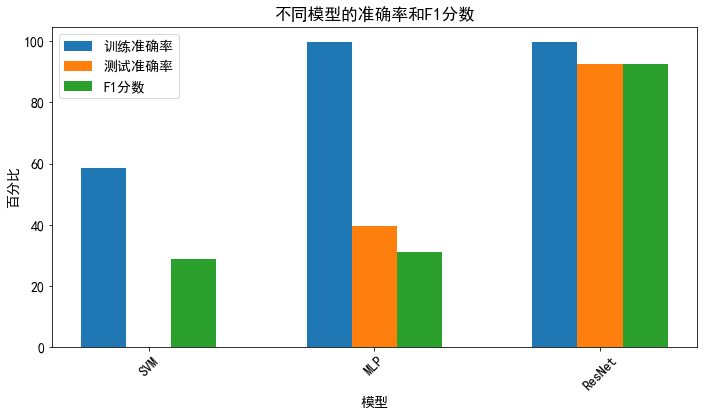

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建数据
data = {
    '模型': ['SVM', 'MLP', 'ResNet'],
    '训练准确率': [58.52, 99.62, 99.62],
    '测试准确率': [None, 39.56, 92.53],
    'F1分数': [28.72, 31.12, 92.55]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 打印表格
print("模型准确率和F1分数表格:")
print(df)

# 绘制条形图
fig, ax = plt.subplots(figsize=(10, 6))

models = df['模型']
train_accuracy = df['训练准确率']
test_accuracy = df['测试准确率']
f1_score = df['F1分数']

bar_width = 0.2
index = range(len(models))

bar1 = ax.bar(index, train_accuracy, bar_width, label='训练准确率')
bar2 = ax.bar([i + bar_width for i in index], test_accuracy, bar_width, label='测试准确率')
bar3 = ax.bar([i + 2 * bar_width for i in index], f1_score, bar_width, label='F1分数')

ax.set_xlabel('模型')
ax.set_ylabel('百分比')
ax.set_title('不同模型的准确率和F1分数')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
